# softmax & visualizations

## import data & data cleaning 

In [1]:
# data cleaning

import pandas as pd
import numpy as np

df = pd.read_csv("456.csv")
df = df.drop('Pos', axis=1)
#race_data.get_loc(46)

df = df.transpose() # columns = laps    # 25 riders and 21 laps
df.head() # column = lap; lap0 = grid position
# row = bike_number

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
1,93.0,4.0,4.0,4.0,4.0,93.0,93.0,93.0,93.0,93.0,...,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0
2,4.0,93.0,93.0,93.0,93.0,4.0,4.0,4.0,46.0,46.0,...,46.0,46.0,46.0,46.0,4.0,4.0,4.0,4.0,4.0,4.0
3,99.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,4.0,4.0,...,4.0,4.0,4.0,4.0,46.0,46.0,46.0,46.0,46.0,46.0
4,46.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,29.0,29.0,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,99.0,99.0,99.0
5,35.0,99.0,99.0,99.0,99.0,99.0,99.0,29.0,38.0,38.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,29.0,29.0,29.0


### display rider dictionary: match bike numbers with rider name 

In [2]:
# map for 22 riders; we do not care other riders
rider_dictionary = []
rider_names = ["Aleix Espargaro", "Alex Rins", "Andrea Dovizioso","Andrea Iannone", "Cal Crutchlow", "Danilo Petrucci","Fabio Quartararo","Francesco Bagnaia","Franco Morbiedelli", "Hafizh Syahrin", "Jack Miller", "Joan Mir", "Johann Zarco","Jorge Lorenzo", "Karel Abraham", "Marc Marquez", "Maverick Vinales", "Miguel Oliviera","Pol Espargaro","Takaaki Nakagami","Tito Rabat","Valentino Rossi"]
rider_numbers = [41,42,4,29,35,9,20,63,21,55,43,36,5,99,17,93,12,88,44,30,53,46]
rider_numbers = [float(i) for i in rider_numbers]
rider_dictionary = dict(zip(rider_numbers, rider_names)) # all riders we care

In [3]:
rider_dictionary

{41.0: 'Aleix Espargaro',
 42.0: 'Alex Rins',
 4.0: 'Andrea Dovizioso',
 29.0: 'Andrea Iannone',
 35.0: 'Cal Crutchlow',
 9.0: 'Danilo Petrucci',
 20.0: 'Fabio Quartararo',
 63.0: 'Francesco Bagnaia',
 21.0: 'Franco Morbiedelli',
 55.0: 'Hafizh Syahrin',
 43.0: 'Jack Miller',
 36.0: 'Joan Mir',
 5.0: 'Johann Zarco',
 99.0: 'Jorge Lorenzo',
 17.0: 'Karel Abraham',
 93.0: 'Marc Marquez',
 12.0: 'Maverick Vinales',
 88.0: 'Miguel Oliviera',
 44.0: 'Pol Espargaro',
 30.0: 'Takaaki Nakagami',
 53.0: 'Tito Rabat',
 46.0: 'Valentino Rossi'}

### track position of all riders & create a dictionary

In [4]:
total_laps = df.shape[1]
rider_position = [] # a list of lists
rider_position_dictionary = [] 
rider_list = df[0]
 
for j in range(len(rider_list)): # loop through all riders
    rider_number = rider_list[j]
    position_track = [] 
    for i in range(total_laps): # i starts from 0
        if rider_number in list(df[i]):
            position_track.append(list(df[i]).index(rider_number)+1)
    rider_position.append(position_track)
    
rider_position_dictionary = dict(zip(rider_list, rider_position))
rider_position_dictionary

{93.0: [1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 4.0: [2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2],
 99.0: [3, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4],
 46.0: [4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
 35.0: [5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
 45.0: [6, 24, 24, 24, 23, 23],
 29.0: [7, 7, 7, 7, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5],
 41.0: [8, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
 44.0: [9],
 38.0: [10, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 9.0: [11, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10],
 25.0: [12,
  14,
  13,
  13,
  11,
  11,
  11,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  9,
  9,
  9,
  9],
 8.0: [13,
  20,
  19,
  16,
  15,
  14,
  13,
  11,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12],
 6.

### define a lap to quarter function

In [5]:
def lap_to_quarter(fraction):
    if fraction<=0.25:
        return 1
    if (fraction>0.25) & (fraction<=0.5):
        return 2
    if (fraction>0.5) & (fraction<=0.75):
        return 3
    if (fraction>0.75) & (fraction<=1):
        return 4

## Count and display passing positions

In [6]:
# passing position
# store all passing positions into a list
rider_passing_dictionary = [] # a dictionary
rider_passing = [] # a list of lists
rider_passing_lap = []
rider_passing_lap_dictionary = []
for number in rider_list: # number = bike number
    single_rider_position = rider_position_dictionary[number]
    passing_position = []
    passing_lap = []
    for i in range(len(single_rider_position)-1):
        fraction = i/total_laps
        if single_rider_position[i]>single_rider_position[i+1]: # means a passing
            passing_position.append(single_rider_position[i])
            passing_lap.append(lap_to_quarter(fraction))
    rider_passing.append(passing_position) # append a list to a list
    rider_passing_lap.append(passing_lap)
rider_passing_dictionary = dict(zip(rider_list, rider_passing))
rider_passing_dictionary

{93.0: [2],
 4.0: [2, 3],
 99.0: [6, 5],
 46.0: [4, 3],
 35.0: [8],
 45.0: [24],
 29.0: [7, 6, 5],
 41.0: [8],
 44.0: [],
 38.0: [10],
 9.0: [11, 10],
 25.0: [14, 13, 11, 10],
 8.0: [20, 19, 16, 15, 14, 13],
 6.0: [15, 12],
 68.0: [15],
 63.0: [16, 23, 22],
 50.0: [17, 14, 17],
 7.0: [18, 17, 15, 14, 13],
 43.0: [19, 13, 15, 14, 14, 14],
 76.0: [20, 20, 18, 18],
 17.0: [21, 18, 18, 17, 16],
 69.0: [22, 19, 18, 17, 16, 15, 14, 14, 14],
 19.0: [23, 21, 20, 19, 18, 17, 16],
 15.0: [24, 22, 21, 20, 19],
 33.0: [25, 23, 22, 22]}

## track and display rider's passing quarter

In [7]:
# passing time
rider_passing_lap_dictionary = dict(zip(rider_list, rider_passing_lap))
rider_passing_lap_dictionary

{93.0: [1],
 4.0: [1, 3],
 99.0: [2, 4],
 46.0: [1, 2],
 35.0: [2],
 45.0: [1],
 29.0: [1, 2, 2],
 41.0: [1],
 44.0: [],
 38.0: [1],
 9.0: [1, 1],
 25.0: [1, 1, 2, 4],
 8.0: [1, 1, 1, 1, 1, 2],
 6.0: [1, 1],
 68.0: [1],
 63.0: [1, 1, 1],
 50.0: [1, 1, 3],
 7.0: [1, 1, 1, 2, 2],
 43.0: [1, 1, 2, 2, 3, 3],
 76.0: [1, 1, 2, 3],
 17.0: [1, 1, 1, 2, 2],
 69.0: [1, 1, 1, 1, 2, 2, 2, 3, 4],
 19.0: [1, 1, 1, 2, 2, 2, 3],
 15.0: [1, 1, 1, 2, 3],
 33.0: [1, 1, 1, 2]}

### summarize and visualize all riders' passing quarter

In [8]:
import matplotlib.pyplot as plt
quarter_num = sum(list(rider_passing_lap_dictionary.values()), [])
quarter_list = []
for i in range(4):
    quarter_list.append(quarter_num.count(i+1))
index = np.arange(4)+1
label = ['quarter 1','quarter 2','quarter 3','quarter 4']
plt.bar(index, quarter_list)
plt.xlabel('passing quarter',color = 'purple')
plt.ylabel('count', color = 'purple')
plt.xticks(index, label,  rotation=30)
plt.title('America 2015 passing count by quarter')
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
pd.DataFrame({'zheng':[1.23,1.24], 'jing':[1,2]})

,jing,zheng
0,1,1.23
1,2,1.24


## compute predator score

In [10]:
# compute passing score for each rider
list_score = [] # store riders score
score_dictionary = [] # dictioary of each rider's score
alpha = 0.7 # tune parameter

# formula: passing score = alpha**(passing_position-1)

for number in rider_list:
    list_score.append(sum(map(lambda x: alpha**(x-1) , rider_passing_dictionary[number])))
score_dictionary = dict(zip(rider_list, list_score))
score_dictionary

{93.0: 0.7,
 4.0: 1.19,
 99.0: 0.4081699999999999,
 46.0: 0.8329999999999999,
 35.0: 0.08235429999999996,
 45.0: 0.0002736874734008088,
 29.0: 0.5258189999999998,
 41.0: 0.08235429999999996,
 44.0: 0,
 38.0: 0.04035360699999998,
 9.0: 0.06860113189999996,
 25.0: 0.09213132014169995,
 8.0: 0.037828283596580733,
 6.0: 0.026555498158489982,
 68.0: 0.006782230728489994,
 63.0: 0.005697089478884577,
 50.0: 0.016335487154620184,
 7.0: 0.03596201716702214,
 43.0: 0.05131863464950041,
 76.0: 0.006932389316818761,
 17.0: 0.013521387509623346,
 69.0: 0.04843305301935886,
 19.0: 0.014354367591057338,
 15.0: 0.0043984591169079715,
 33.0: 0.001699655064405431}

In [11]:
rider_passing_dictionary

{93.0: [2],
 4.0: [2, 3],
 99.0: [6, 5],
 46.0: [4, 3],
 35.0: [8],
 45.0: [24],
 29.0: [7, 6, 5],
 41.0: [8],
 44.0: [],
 38.0: [10],
 9.0: [11, 10],
 25.0: [14, 13, 11, 10],
 8.0: [20, 19, 16, 15, 14, 13],
 6.0: [15, 12],
 68.0: [15],
 63.0: [16, 23, 22],
 50.0: [17, 14, 17],
 7.0: [18, 17, 15, 14, 13],
 43.0: [19, 13, 15, 14, 14, 14],
 76.0: [20, 20, 18, 18],
 17.0: [21, 18, 18, 17, 16],
 69.0: [22, 19, 18, 17, 16, 15, 14, 14, 14],
 19.0: [23, 21, 20, 19, 18, 17, 16],
 15.0: [24, 22, 21, 20, 19],
 33.0: [25, 23, 22, 22]}

In [12]:
df_all = pd.DataFrame.from_dict(score_dictionary,orient='index')
df_all
df_all = df_all.rename(columns={0: "predator_score"})
df_all['predator_score']/max(df_all['predator_score'])
df_all = df_all.sort_values(by=['predator_score'],ascending = False)
df_all

,predator_score
4.0,1.190000
46.0,0.833000
93.0,0.700000
29.0,0.525819
99.0,0.408170
25.0,0.092131
35.0,0.082354
41.0,0.082354
9.0,0.068601
43.0,0.051319


## subset the predator score & convert bike number to rider names

In [13]:
# intersection of all 22 riders and all participants
sub_score_dictionary = dict((k, score_dictionary[k]) for k in list(set(rider_numbers) & set(rider_list)))
# map bike numbers to rider names
sub_score_dictionary = dict((rider_dictionary[key], value) for (key, value) in sub_score_dictionary.items())
sub_score_dictionary

{'Cal Crutchlow': 0.08235429999999996,
 'Andrea Dovizioso': 1.19,
 'Jorge Lorenzo': 0.4081699999999999,
 'Danilo Petrucci': 0.06860113189999996,
 'Aleix Espargaro': 0.08235429999999996,
 'Jack Miller': 0.05131863464950041,
 'Pol Espargaro': 0,
 'Valentino Rossi': 0.8329999999999999,
 'Karel Abraham': 0.013521387509623346,
 'Marc Marquez': 0.7,
 'Andrea Iannone': 0.5258189999999998,
 'Francesco Bagnaia': 0.005697089478884577}

In [14]:
# sort the predator_score from high to low 
df = pd.DataFrame.from_dict(sub_score_dictionary,orient='index')
df = df.rename(columns={0: "predator_score"})
df['predator_score']/max(df['predator_score'])
df_sort = df.sort_values(by=['predator_score'],ascending = False)
df_sort

,predator_score
Andrea Dovizioso,1.190000
Valentino Rossi,0.833000
Marc Marquez,0.700000
Andrea Iannone,0.525819
Jorge Lorenzo,0.408170
Cal Crutchlow,0.082354
Aleix Espargaro,0.082354
Danilo Petrucci,0.068601
Jack Miller,0.051319
Karel Abraham,0.013521


## visualize the ranking of riders, in terms of predator score

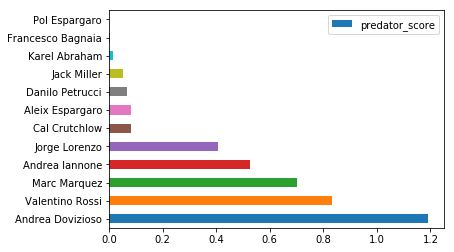

In [15]:
# visualization
df_sort.plot.barh(y = 'predator_score')

## Softmax predator score to (0,1)

In [16]:
# softmax
df1 = df
df1['predator_score']= 1-df1['predator_score']/max(df['predator_score'])
df1.columns = ['final predator score']
df1_sort = df1.sort_values(by=['final predator score'],ascending = True)
# 0 is the top predator, 1 is the worst predator.
# the gap between scores in df1 is comparable to that in df
df1_sort

,final predator score
Andrea Dovizioso,0.000000
Valentino Rossi,0.300000
Marc Marquez,0.411765
Andrea Iannone,0.558135
Jorge Lorenzo,0.657000
Cal Crutchlow,0.930795
Aleix Espargaro,0.930795
Danilo Petrucci,0.942352
Jack Miller,0.956875
Karel Abraham,0.988637


### print out the riders who do not participate in the race

In [17]:
# print non-participants
print(22 - df.shape[0], "riders out of 22 did not participate")
print("list of non-participants:\n")
non_participants = set(rider_names)-(set(sub_score_dictionary.keys()))
print(non_participants)

10 riders out of 22 did not participate
list of non-participants:

{'Miguel Oliviera', 'Tito Rabat', 'Alex Rins', 'Hafizh Syahrin', 'Maverick Vinales', 'Joan Mir', 'Franco Morbiedelli', 'Fabio Quartararo', 'Johann Zarco', 'Takaaki Nakagami'}
